# Module 14 – Practice Notebook: Logistic Regression on Iris (Binary)

This is another practice notebook for Module 14 using a **different dataset**.

We will use the classic `sklearn` iris dataset, but convert it into a binary classification problem:

- Target: `Iris-setosa` vs `other species`

You will repeat the same core steps you learned before, but on a new dataset.

**Sections:**
- 0: Setup
- 1: Data loading and preprocessing
- 2: Basic logistic regression
- 3: Evaluation metrics
- 4: L2 regularization
- 5: Threshold exploration

Fill in the `TODO` parts yourself.


## Section 0 – Setup

Run this cell first. It imports all required libraries.


In [1]:
# Imports for the whole notebook

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.grid"] = True

print("Setup complete.")

Setup complete.


## Section 1 – Data Loading and Preprocessing

In this section you will:
- Load the iris dataset
- Turn it into a binary classification: `setosa` vs `other`
- Put everything into a DataFrame for quick inspection


In [2]:
# TODO: Load the iris dataset using load_iris() [Done for you]

# Your code here:
data = load_iris()
X = data.data
y_multi = data.target

print("Original target classes:", np.unique(y_multi))
print("Class names:", data.target_names)

Original target classes: [0 1 2]
Class names: ['setosa' 'versicolor' 'virginica']


In [6]:
# TODO: Convert the multiclass target into binary target [Done for you]
# We define y = 1 if the class is 'setosa' (class 0), else 0.
# So the problem becomes: 'setosa' vs 'non setosa'.

# Your code here:
y = (y_multi == 0).astype(int)

print("Binary target classes:", np.unique(y))
print("Number of setosa (1):", y.sum())
print("Number of non setosa (0):", len(y) - y.sum())

Binary target classes: [0 1]
Number of setosa (1): 50
Number of non setosa (0): 100


In [14]:
# TODO: Create a DataFrame for inspection
# Use data.feature_names as column names and add a 'target' column

# Your code here:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.sample(10)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
71,6.1,2.8,4.0,1.3,0
147,6.5,3.0,5.2,2.0,0
100,6.3,3.3,6.0,2.5,0
92,5.8,2.6,4.0,1.2,0
119,6.0,2.2,5.0,1.5,0
88,5.6,3.0,4.1,1.3,0
46,5.1,3.8,1.6,0.2,1
60,5.0,2.0,3.5,1.0,0
95,5.7,3.0,4.2,1.2,0
6,4.6,3.4,1.4,0.3,1


In [15]:
# TODO: Show basic statistics of the numeric features using df.describe()

# Your code here:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,0.333333,0.472984,0.0,0.0,0.00,1.0,1.0


## Section 2 – Train Test Split and Scaling

Split the data and scale the features.


In [20]:
# TODO: Split the data into train and test sets
# Use test_size=0.3, random_state=42, stratify=y

# Hint:
# X_train, X_test, y_train, y_test = train_test_split(...)

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_train.shape
y_train.shape
X_test.shape

(45, 4)

In [ ]:
# TODO: Scale the features using StandardScaler
# 1. Fit the scaler on X_train and transform X_train
# 2. Use the same scaler to transform X_test

# Your code here:
scaler = StandardScaler()

scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.3100623 , -0.50256349,  0.484213  , -0.05282593],
       [-0.17225683,  1.89603497, -1.26695916, -1.27039917],
       [ 2.23933883, -0.98228318,  1.76840592,  1.43531914],
       [ 0.18948252, -0.26270364,  0.36746819,  0.35303182],
       [ 1.15412078, -0.50256349,  0.54258541,  0.2177459 ],
       [-0.53399618,  0.93659559, -1.38370397, -1.13511325],
       [-0.29283662, -0.26270364, -0.15788346,  0.08245999],
       [ 1.27470056,  0.21701605,  0.71770262,  1.43531914],
       [ 0.43064208, -1.94172256,  0.36746819,  0.35303182],
       [-0.05167705, -0.74242333,  0.01723376, -0.05282593],
       [ 0.79238143,  0.4568759 ,  0.71770262,  1.0294614 ],
       [-1.25747488, -0.02284379, -1.44207638, -1.540971  ],
       [-0.4134164 ,  1.17645543, -1.50044878, -1.40568508],
       [-1.1368951 ,  0.21701605, -1.38370397, -1.540971  ],
       [-0.89573553,  1.89603497, -1.38370397, -1.27039917],
       [ 0.55122187,  0.69673574,  0.484213  ,  0.48831773],
       [ 0.79238143, -0.

## Section 3 – Basic Logistic Regression

Train a logistic regression model and check accuracy.


In [22]:
# TODO: Train a logistic regression model using LogisticRegression(max_iter=1000)

# Your code here:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# TODO: Predict on the test set and compute accuracy

# Your code here:
y_pred = model.predict(X_test)

print('Accuracy: ',accuracy_score(y_test, y_pred))


Accuracy:  1.0


1.0

## Section 4 – Evaluation Metrics

Now compute more detailed metrics: precision, recall, F1, confusion matrix, and a classification report.


In [28]:
# TODO: Compute precision, recall, and F1 score

# Your code here:
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [29]:
# TODO: Compute the confusion matrix and print it

# Your code here:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 0 19]]


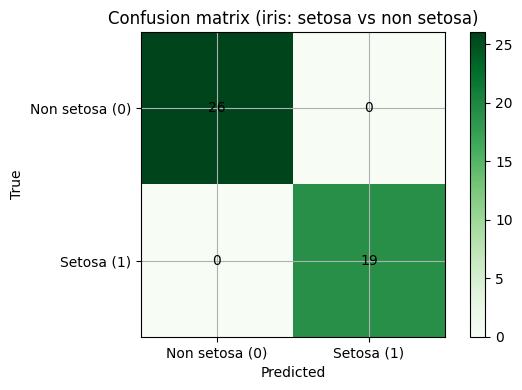

In [30]:
# TODO: Visualize the confusion matrix as an image [Done for you]

# Your code here:
plt.imshow(cm, cmap="Greens")
plt.title("Confusion matrix (iris: setosa vs non setosa)")
plt.colorbar()
plt.xticks([0, 1], ["Non setosa (0)", "Setosa (1)"])
plt.yticks([0, 1], ["Non setosa (0)", "Setosa (1)"])
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

In [31]:
# TODO: Print the classification report

# Your code here:
print('Classification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Section 5 – L2 Regularization Study

Train two models with different C values and compare accuracies and coefficient sizes.

- Model A: C = 1000 (weak regularization)
- Model B: C = 0.01 (strong regularization)


In [33]:
# TODO: Train two logistic regression models with different C values

# Your code here:
clf_weak_reg = LogisticRegression(max_iter=100, C=1000.0)
clf_strong_reg = LogisticRegression(max_iter=100, C=.01)

clf_weak_reg.fit(X_train, y_train)
clf_strong_reg.fit(X_train, y_train)

y_pred_weak = clf_weak_reg.predict(X_test)
y_pred_strong = clf_strong_reg.predict(X_test)

print('Weak reg (c=1000) test accuracy:', accuracy_score(y_test, y_pred_weak))
print('Strong reg (c=.01) test accuracy:', accuracy_score(y_test, y_pred_strong))

Weak reg (c=1000) test accuracy: 1.0
Strong reg (c=.01) test accuracy: 1.0


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (4,).

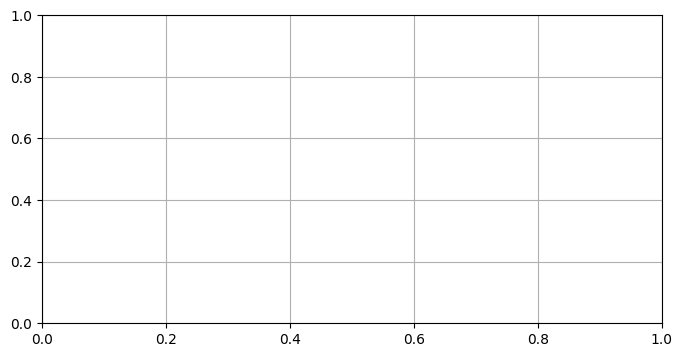

In [34]:
# TODO: Plot the absolute coefficients for all features for both models

# Hint:
coef_weak = clf_weak_reg.coef_[0]
coef_strong = clf_strong_reg.coef_[0]

# Your code here:
# Plot absolute values for the first 10 coefficients
n_plot = 10
indices = np.arange(n_plot)

plt.figure(figsize=(8, 4))
plt.bar(indices - 0.15, np.abs(coef_weak[:n_plot]), width=0.3, label="C=1000")
plt.bar(indices + 0.15, np.abs(coef_strong[:n_plot]), width=0.3, label="C=0.01")
plt.xticks(indices, feature_names[:n_plot], rotation=45, ha="right")
plt.ylabel("Absolute coefficient value")
plt.title("Effect of L2 regularization on coefficients (first 10 features)")
plt.legend()
plt.tight_layout()
plt.show()

**Questions for you:**

- Which model has smaller coefficients overall?
- Do you see a big difference in accuracy?
- When might you prefer stronger regularization in a small dataset like iris?


## Section 6 – Threshold Exploration

Experiment with different probability thresholds and see how precision and recall change.


In [ ]:
# TODO: Get predicted probabilities from the base model `clf`
# Use the positive class probability (setosa = 1).

# Your code here:


In [ ]:
# TODO: Try thresholds between 0.1 and 0.9 and compute metrics

# Hint:
# thresholds = np.linspace(0.1, 0.9, 9)

# Your code here:


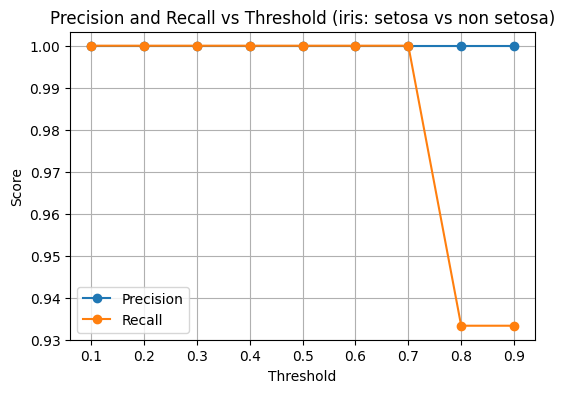

In [ ]:
# TODO: Plot precision and recall vs threshold [Done for you]

# Your code here:
plt.plot(thr_df["threshold"], thr_df["precision"], marker="o", label="Precision")
plt.plot(thr_df["threshold"], thr_df["recall"], marker="o", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold (iris: setosa vs non setosa)")
plt.legend()
plt.grid(True)
plt.show()

**Reflection:**

- When you lower the threshold, what happens to recall? What about precision?
- If you treat 'setosa' as a rare, important species that you never want to miss, what kind of threshold would you choose?

By now, you have implemented logistic regression on yet another dataset. This should make you confident that the ideas transfer across datasets, not just work on one example.
